### Data Exploration and Visualisation

For this notebook, let's plot some charts and have a closer look at the data

In [66]:
import numpy as np
import pandas as pd
import os
import datetime as dt
from pandas.api.types import CategoricalDtype

#plots
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
#style.available
#sns.set_context('talk')
#sns.set_context('paper')

print("pandas version: " + pd.__version__)

#nicer display of tables, display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pandas version: 1.0.3


In [4]:
#setup the folders
dir_data = r'Sales_Data'
dir_out  = r'Output'

file_cleaned = "cleaned_data.csv"

In [17]:
#read the cleaned data
df  = pd.read_csv(dir_out + "/" +file_cleaned, parse_dates=['datetime'])

In [18]:
#inspect the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186495 entries, 0 to 186494
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Purchase Address  185950 non-null  object        
 5   datetime          185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.5+ MB


Let's look at the Product Range

In [74]:
print("Number of Products in Scope: "+ str(df["Product"].nunique())

Number of Products in Scope: 20


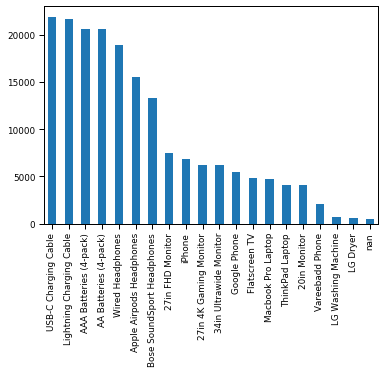

In [25]:
df["Product"].value_counts().plot(kind='bar');

In [31]:
print("Sales Start :" + str(df['datetime'].min()))
print("Sales End :" + str(df['datetime'].max()))

Sales Start :2019-01-01 03:07:00
Sales End :2020-01-01 05:13:00


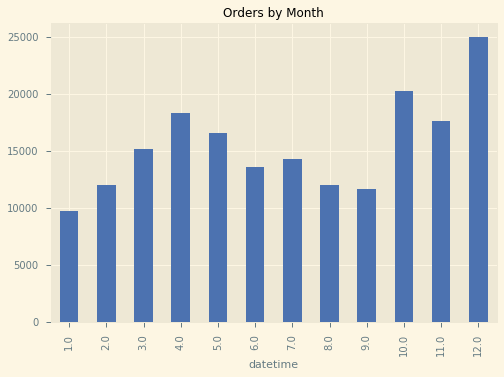

In [67]:
df['Order ID'].groupby(df['datetime'].dt.month).count().plot(kind='bar');
plt.title("Orders by Month");
#style.use('Solarize_Light2');
#style.use('seaborn-deep') #sets the size/style of the charts
style.use('seaborn-notebook');

In [50]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,datetime
0,295665.0,Macbook Pro Laptop,1.0,1700.00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00
1,295666.0,LG Washing Machine,1.0,600.00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00
2,295667.0,USB-C Charging Cable,1.0,11.95,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00
3,295668.0,27in FHD Monitor,1.0,149.99,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00
4,295669.0,USB-C Charging Cable,1.0,11.95,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00


Let's add a column to calculate Sales in Dollars

In [53]:
df['Sales'] = df['Quantity Ordered'] * df["Price Each"]
#check calculations where Qty >1 ;
df[df["Quantity Ordered"]>1].head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,datetime,Sales
7,295672.0,USB-C Charging Cable,2.0,11.95,"813 Hickory St, Dallas, TX 75001",2019-12-13 09:29:00,23.90
9,295674.0,AAA Batteries (4-pack),4.0,2.99,"77 7th St, Dallas, TX 75001",2019-12-28 11:51:00,11.96
10,295675.0,USB-C Charging Cable,2.0,11.95,"594 1st St, San Francisco, CA 94016",2019-12-13 13:52:00,23.90
12,295677.0,AA Batteries (4-pack),2.0,3.84,"866 Pine St, Boston, MA 02215",2019-12-20 19:19:00,7.68
13,295678.0,AAA Batteries (4-pack),2.0,2.99,"187 Lincoln St, Dallas, TX 75001",2019-12-06 09:38:00,5.98


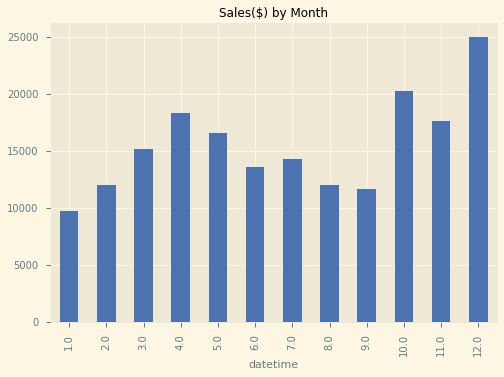

In [68]:
df['Sales'].groupby(df['datetime'].dt.month).count().plot(kind='bar');
plt.title("Sales($) by Month");
#style.use('Solarize_Light2');
style.use('seaborn-deep'); #sets the size/style of the charts

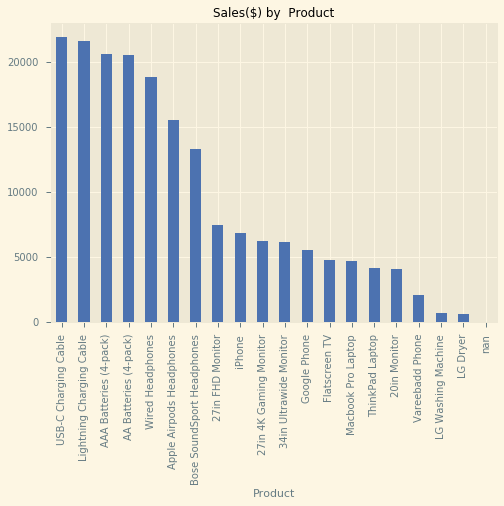

In [69]:
df['Sales'].groupby(df["Product"]).count().sort_values(ascending=False).plot(kind='bar');
plt.title("Sales($) by  Product");

#style.use('Solarize_Light2');
style.use('seaborn-deep'); #sets the size/style of the charts

The highest sales by products are listed below:

In [71]:
df['Sales'].groupby(df["Product"]).count().sort_values(ascending=False).head(10)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
Name: Sales, dtype: int64